In [81]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


In [82]:
df = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv")
df2 = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/test.csv")

In [83]:
df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [84]:
df2.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


I will drop the satisfaction column from the test dataset and store it in submissions

In [85]:
submissions = df2['satisfaction']
df2.drop('satisfaction', axis=1, inplace=True)

In [86]:
df.shape, df2.shape

((103904, 25), (25976, 24))

# Loading Packages

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Data

In [88]:
# create a copy of our original dataset
df_original = df.copy()
df2_original = df2.copy()

In [89]:
# features present in our dataset
print(df.columns)

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


We have 24 independent variables and 1 target variable that is 'satisfaction'

Given below is the description for each variable
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [90]:
# data types for each variable
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

We can see that there are three format of data types: Object, int64 and float64

In [91]:
# drop unessessary columns
df.drop(['Unnamed: 0',"id"], axis=1, inplace=True)
df2.drop(['Unnamed: 0',"id"], axis=1, inplace=True)

In [92]:
# let's look at the shape of our dataset
df.shape, df2.shape

((103904, 23), (25976, 22))

For Training we have 103904 rows and 23 columns

For testing we have 25976 rows and 22 columns

# **Target Variable**
We will first look at the target variable. i.e., Satisfaction. As it is a categorical variable, I will look at the frequency table, percentage distribution and bar plot. Frequency table of a variable will give us the count each category in that variable

In [93]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

From the about frequency table we can say that the frequency of class neural or dissatisfied is greater than satisfied, so I will consider it as an imbalanced class distribution problem

In [94]:
# Normalize can be set to True to print proportions instead of number
df['satisfaction'].value_counts(normalize=True)

satisfaction
neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: proportion, dtype: float64

<Axes: xlabel='satisfaction'>

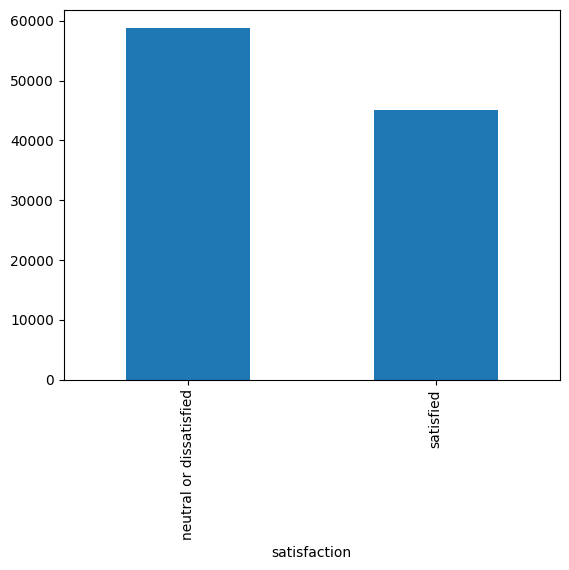

In [95]:
df['satisfaction'].value_counts().plot.bar()

45025 people (around 43%) gave satisfied remark out of  people 103904

# **Visualization**
Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

1] Categorical columns: Gender, Customer Type, Type of Travel

2] Ordinal columns: Class, 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness'

3] Numerical columns: ID, Age, 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'

### Visualize categorical variables

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Type of Travel')

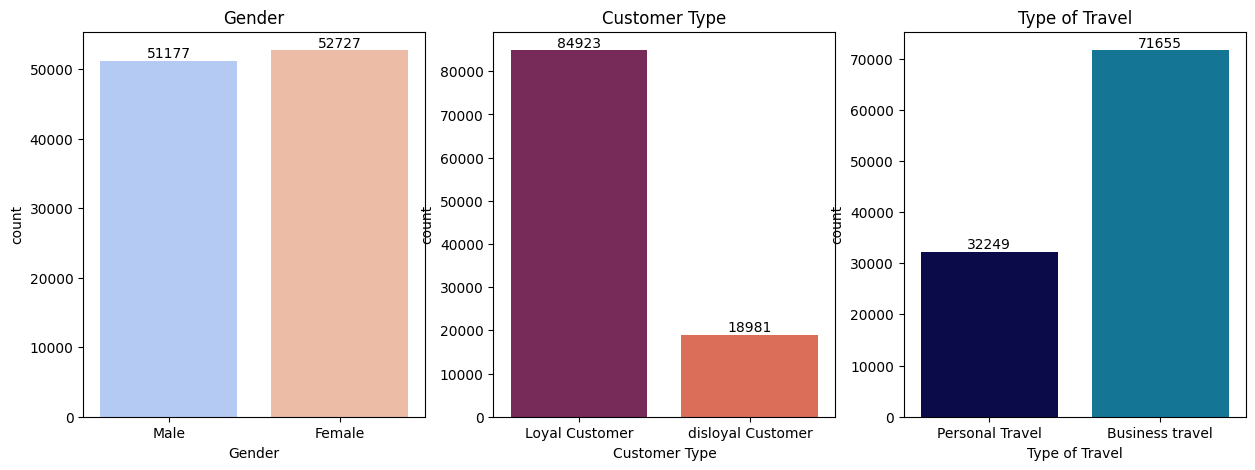

In [97]:
plt.figure(figsize = (15,5))

#Subplot 1: Distribution of Gender Category
plt.subplot(1, 3, 1)
a = sns.countplot(data=df, x = 'Gender', palette='coolwarm')
plt.bar_label(a.containers[0])
plt.title("Gender")

#Subplot 2: Distribution of Customer type
plt.subplot(1, 3, 2)
a = sns.countplot(data = df, x="Customer Type", palette='rocket')
plt.bar_label(a.containers[0])
plt.title("Customer Type")

#Subplot 3: Distribution of Type of Travel
plt.subplot(1, 3, 3)
a = sns.countplot(data= df, x="Type of Travel", palette="ocean")
plt.bar_label(a.containers[0])
plt.title("Type of Travel")

It can be infered from the above bar plots that:
* Ther are more Female population in the training dataset

* Almost 82% of the population in the dataset are loyal customers

* Almost 70% of the customers travel for business purposes

### Visualize Ordinal Variable "Class"

<Axes: xlabel='Class', ylabel='count'>

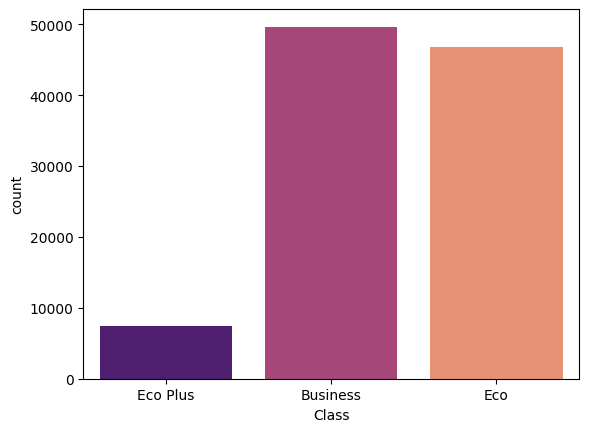

In [98]:
sns.countplot(data = df, x="Class", palette="magma")

Majority of the passengers travel from Business and Economy class

### Visualize Numerical Features
Let's look at the distribution of flight distance first.

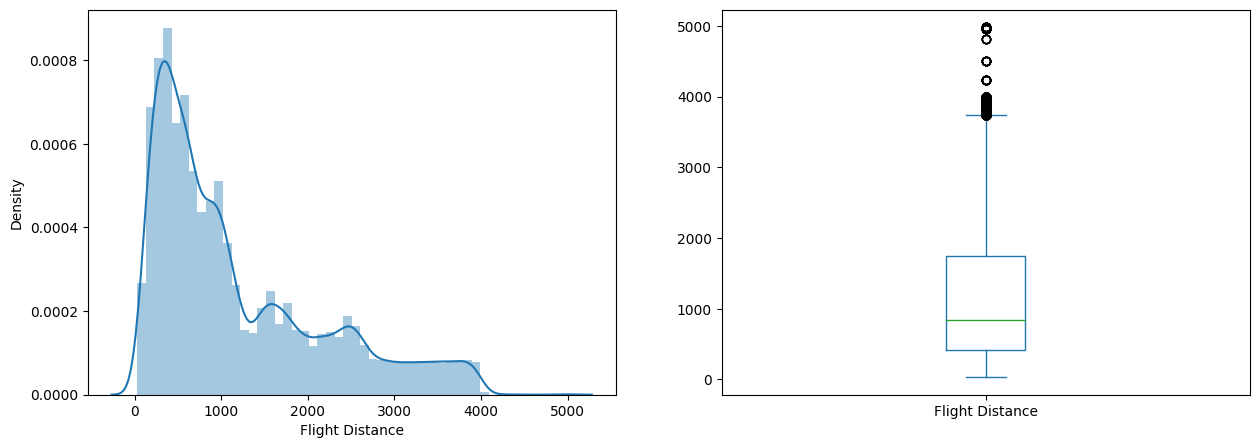

In [99]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(df['Flight Distance'])

plt.subplot(1, 2, 2)
df['Flight Distance'].plot.box()
plt.show()

It can be inferred that most of the data in the flight distance is towards left which means that it is not normally distributed. I will try to make it normal in later sections as algorithms work better if the data is normally distributed.

The boxplot confirms the presence of outliers/extreme values. This is attibuted to the place a perticular passenger is travelling to. Since, the location information is not available it is hard to make the further analysis

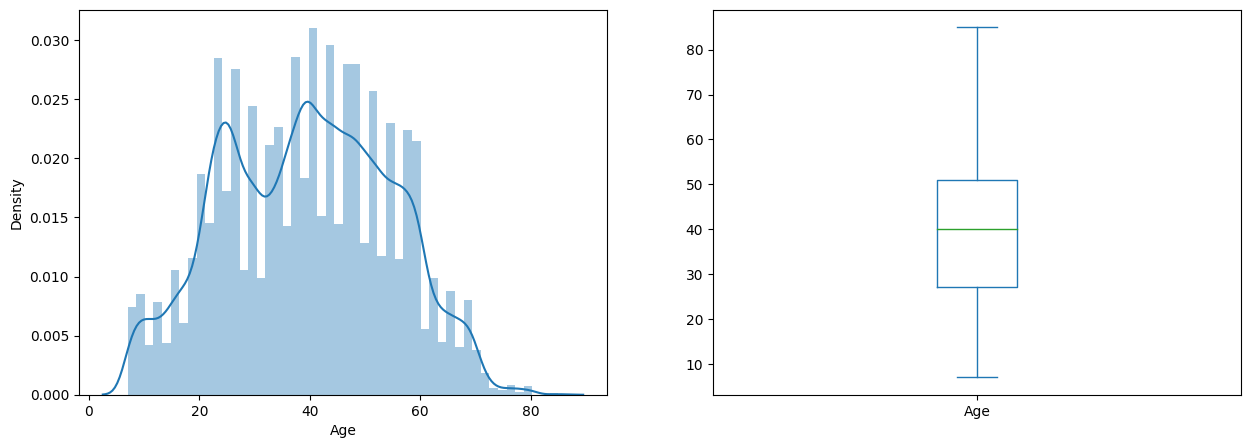

In [100]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(df['Age'])

plt.subplot(1, 2, 2)
df['Age'].plot.box()
plt.show()

According to the above plots the Age attribute looks well distributed and no outliers are found in the age data

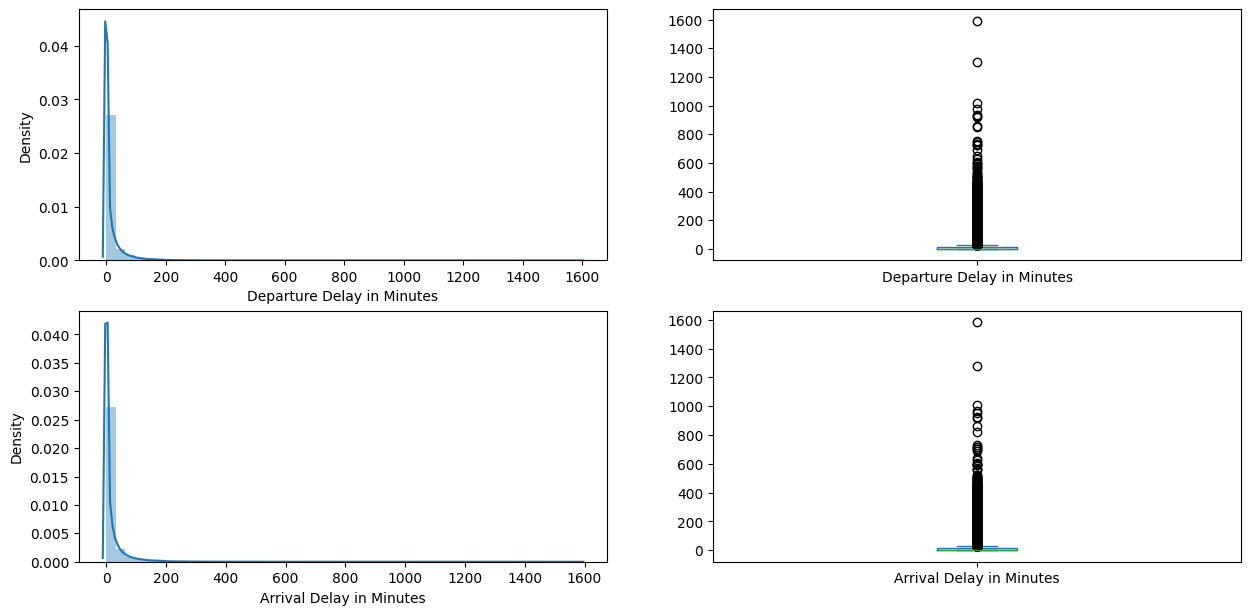

In [101]:
plt.figure(figsize=(15,15))
plt.subplot(4, 2, 1)
sns.distplot(df['Departure Delay in Minutes'])

plt.subplot(4, 2, 2)
df['Departure Delay in Minutes'].plot.box()

plt.subplot(4, 2, 3)
sns.distplot(df['Arrival Delay in Minutes'])

plt.subplot(4, 2, 4)
df['Arrival Delay in Minutes'].plot.box()
plt.show()

From the above distribution we can infer that both "Departure Delay in Minutes" and "Arrival Delay in Minutes" have majority of there delays between 0 to 100 minutes. We also see a lot of outliers (one of the delay is upto 1600 minutes) in both of these variables and they are not normally distributed

In [102]:
df['Departure Delay in Minutes'].max(), df['Departure Delay in Minutes'].min()

(1592, 0)

In [103]:
df['Arrival Delay in Minutes'].max(), df['Arrival Delay in Minutes'].min()

(1584.0, 0.0)

**Now let's look at all the ordinal variables that shows the passenger statisfaction rate for different attributes**

In [104]:
listt = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

print(f'We have to total {len(listt)} attributes that passengers have rated')

We have to total 14 attributes that passengers have rated


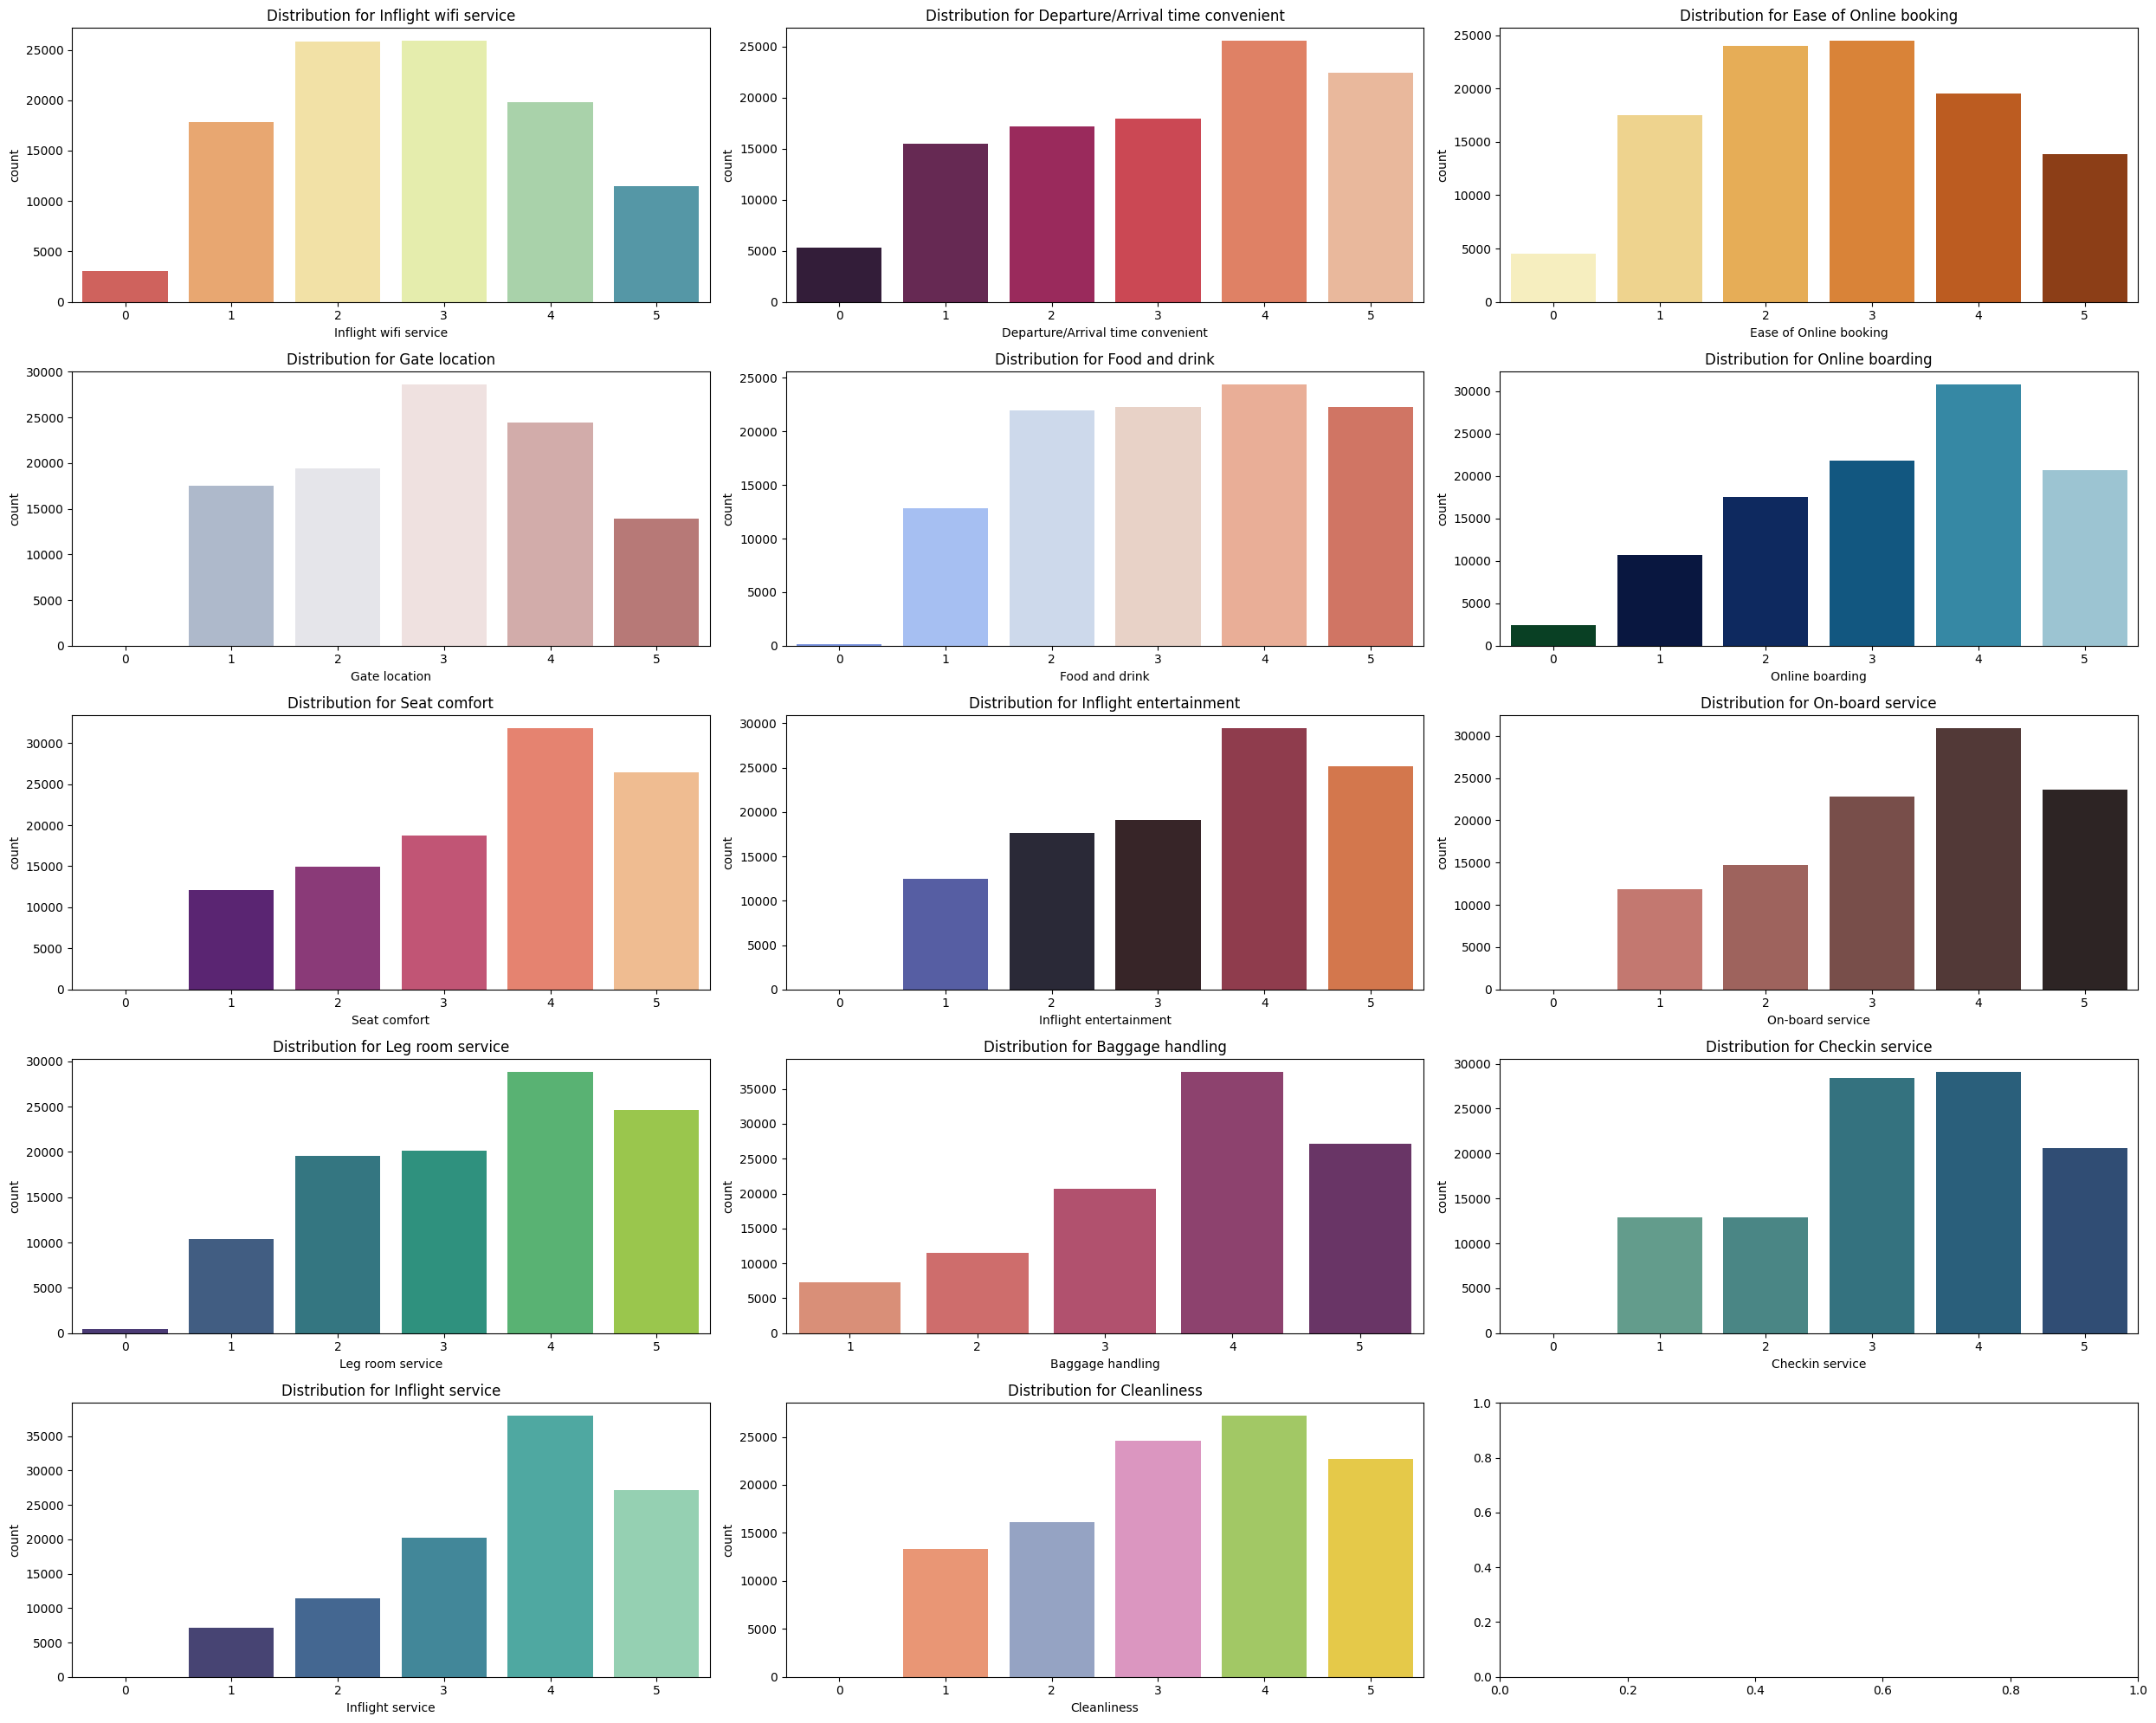

In [105]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(25,20))
plt.subplots_adjust(hspace=0.5)
palettes=["Spectral",'rocket','YlOrBr',"vlag",'coolwarm','ocean','magma',"icefire","dark:salmon_r","viridis","flare","crest","mako","Set2"]

for i, feature in enumerate(listt):
    row_index = i // 3
    col_index = i % 3
    
    sns.countplot(data=df, x=feature, ax=axes[row_index, col_index], palette=palettes[i])
    axes[row_index, col_index].set_title(f"Distribution for {feature}")
    
plt.tight_layout()
plt.show()

Following inferences have been made by observing the above plots:

1]**'Ease of Online booking', 'Inline WI-FI Service', Gate location'** has received predominantly **level 3** satisfaction ratings from most passengers

2] **'Departure/Arrival time convenient', 'Food and drink', 'Online boarding', 'Seat comfort', 
       'Inflight entertainment', 'On-board service', 'Baggage handling', 'Leg room service', 'Checkin service', 'Inflight service', 
       'Cleanliness'** has received predominantly **level 4** satisfaction ratings from most passengers.
       
Most of the services have received level 4 satisfaction rating

### Categorical Independent Variable v/s Target Variable

First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of Satisifed and Neutral/Dissatisfied passengers. 

<Axes: xlabel='Gender'>

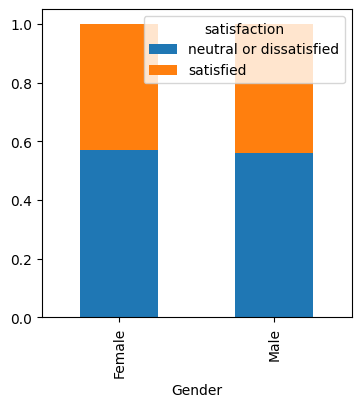

In [106]:
Gender = pd.crosstab(df['Gender'], df['satisfaction'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

It can be inferred that proportion of male and female applicants is more or less same for both satisfied and neutral/dissatisfied class

Now let's visualize for other three categorical variable 'Customer Type', 'Type of Travel and 'Class'

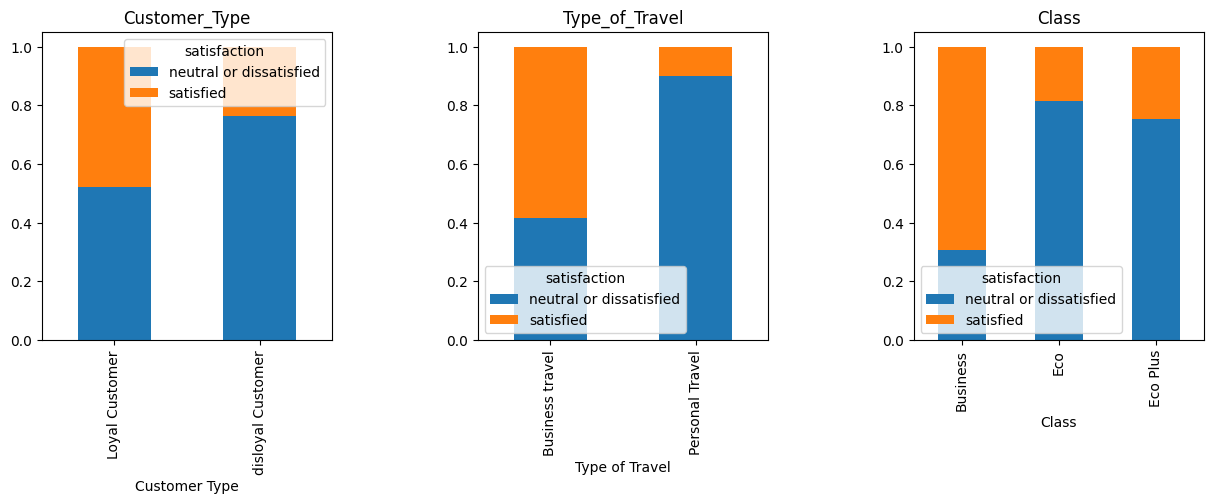

In [107]:
Customer_type = pd.crosstab(df['Customer Type'], df['satisfaction'])
Type_of_Travel = pd.crosstab(df['Type of Travel'], df['satisfaction'])
Class = pd.crosstab(df['Class'], df['satisfaction'])

fig, axis = plt.subplots(nrows =1, ncols=3, figsize=(15,4))
Customer_type.div(Customer_type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axis[0])
axis[0].set_title('Customer_Type')

Type_of_Travel.div(Type_of_Travel.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,  ax=axis[1])
axis[1].set_title('Type_of_Travel')

Class.div(Class.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,  ax=axis[2])
axis[2].set_title('Class')

plt.subplots_adjust(wspace=0.5)
plt.show()

* Proportion of Satisfied review is higher for the Loyal Customers than the Disloyal Customers, therefore it seems like **loyal customers are more likely to give satisfied reviews.**
* Proportion of Satisfied review is higher for Business Travellers than Personal Travellers, therefore it seems like **Business Travellers are more likely to give satisfied reviews.**

* Proportion of Satisfied review is higher for Business class than Econ and Eco plus, therefore it seems like **Business class passengers are more likely to give satisfied reviews.**

Note that for every feature there is a significant different in the proportion of satisfied and neutral/dissatisfied review between each classes.



### Numerical Independent Variable v/s Target Variable

I will try to find the median fight distance for which passangers have given satisfied or neutral/dissatisfied reviews.

Since we saw earlier that fight distance data is right skewed, it is appropriate to consider median as the measure of central tendency

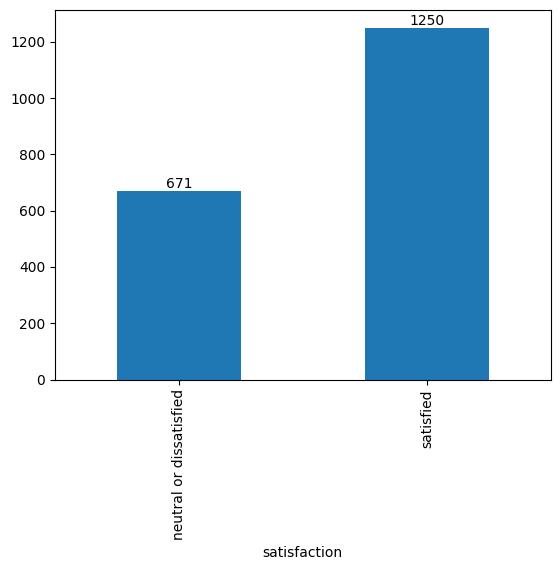

In [108]:
plot = df.groupby('satisfaction')['Flight Distance'].median().plot.bar()
plt.bar_label(plot.containers[0])
plt.show()

Passengers who reported **satisfaction exhibited a notably higher median flight distance of 1250 miles**, while those who reported **neutral or dissatisfied reviews displayed a comparatively lower median flight distance of 671 miles**.

Now, let's analyse how Age affects the satisfaction statues of a passengers. For that it's best to convert age (numerical variable) into bins

In [109]:
print(f"{df['Age'].max()} ,{df['Age'].min()}")

85 ,7


In [110]:
bins = [0,10,20,30,40,50,60,70,80,90]
groups = ['0-9','11-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89']
df['Age'] = pd.cut(df['Age'], bins, labels=groups)

Text(0, 0.5, 'Percentage')

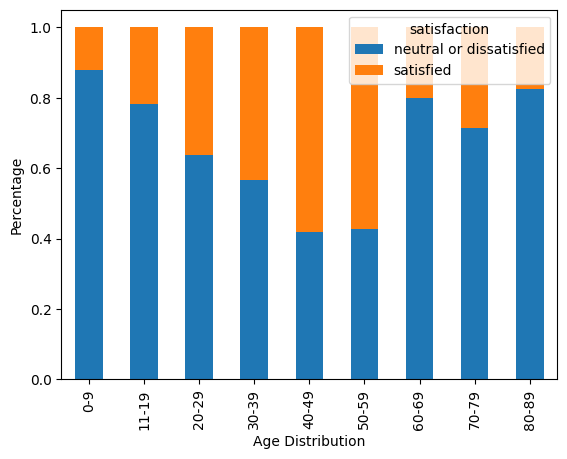

In [111]:
Age_bin = pd.crosstab(df['Age'], df['satisfaction'])
Age_bin.div(Age_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Age Distribution')
plt.ylabel('Percentage')

From the above plot we can infer that the **satisfaction level significantly increased with the increase in Age till 50-59 after which there is a drastic shift from satisfied to neutral/dissatisfied**

Perform similar prepeocessing for test dataset

In [112]:
df2['Age'] = pd.cut(df2['Age'], bins, labels=groups)

Next, we have "Departure delay in minutes" and "Arrival" delay in minutes", I will combine both of them to create a new column "Total Delay". This combined metric would represent the total amount of time a flight was delayed, including both the departure and arrival aspects.

In [113]:
df['Total Delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']

In [114]:
df2['Total Delay'] = df2['Departure Delay in Minutes'] + df2['Arrival Delay in Minutes']

And now I will visualize the distribution of "Total Delay" of flight

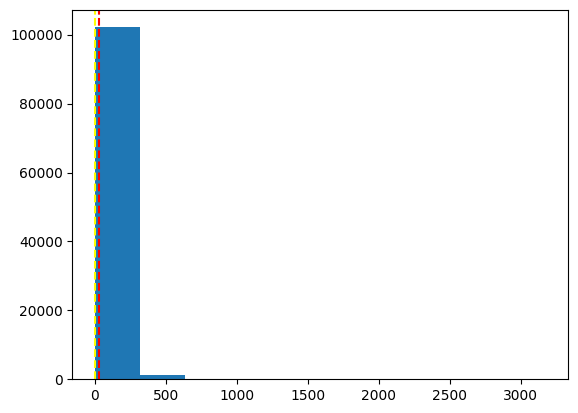

In [115]:
plt.hist(df['Total Delay'], bins=10)

#Representing mean and median on the graph
plt.axvline(df['Total Delay'].mean(), color='red', linestyle='--', label=f"Mean = {df['Total Delay'].mean()}")
plt.axvline(df['Total Delay'].median(), color='yellow', linestyle='--', label=f"Median = {df['Total Delay'].median()}")

plt.show()

As expected **most of the values lie around 0-300** compare it with respect to the satisfaction level

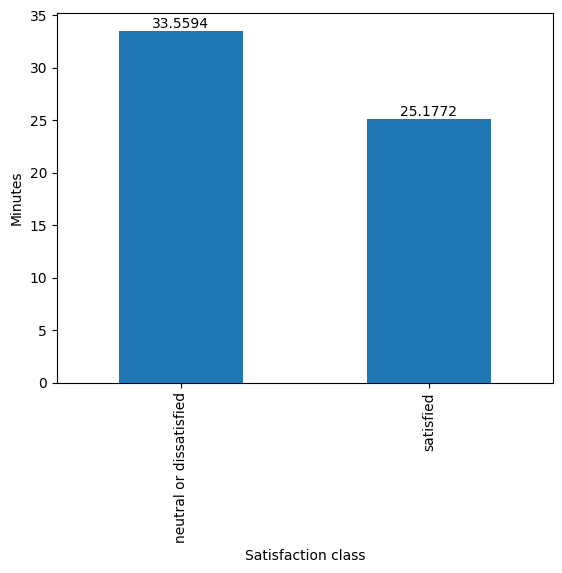

In [116]:
plot = df.groupby('satisfaction')['Total Delay'].mean().plot.bar()
plt.bar_label(plot.containers[0])
plt.xlabel("Satisfaction class")
plt.ylabel("Minutes")
plt.show()

Passengers who reported satisfaction had experienced less delay time of average 25 minutes , while those who reported neutral or dissatisfied reviews had higher delay time of average 34 minutes.

Now I will convert the target variable's categories into 0 and 1 so that I can find its correlation with the numerical variables.

One more reason to do so is few models like logistic regression takes only numeric values as input. I will replace "neutral or dissatisfied" with 0 and "satisfied" with 1. 

In [117]:
df['satisfaction'].replace("neutral or dissatisfied",0, inplace=True)
df['satisfaction'].replace("satisfied",1, inplace=True)

In [118]:
submissions.replace("neutral or dissatisfied",0, inplace=True)
submissions.replace("satisfied",1, inplace=True)

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

<Axes: >

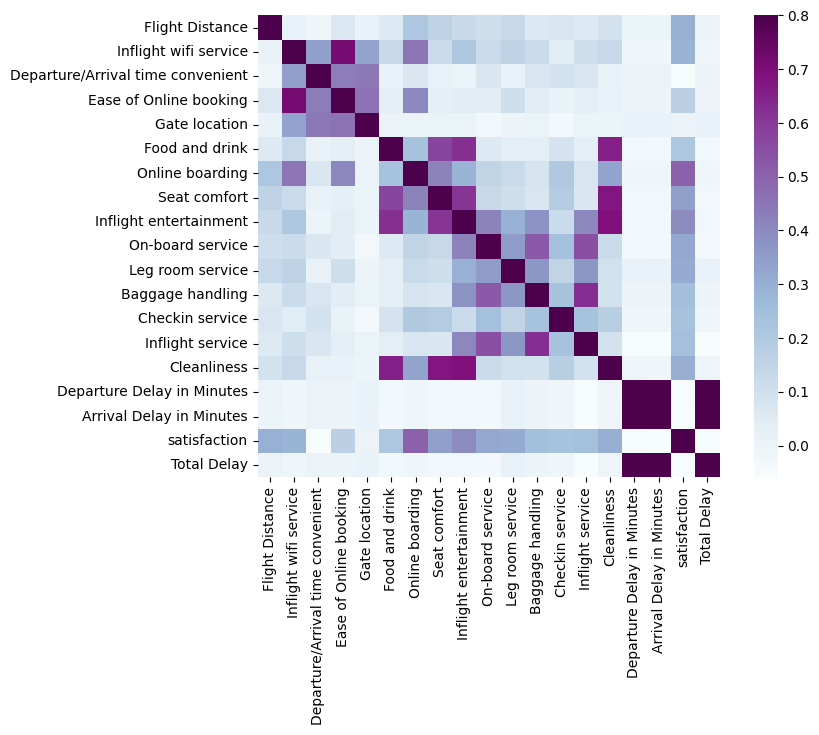

In [119]:
numerical_df = df.select_dtypes(include=['number'])

matrix = numerical_df.corr()
fig, axis = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

We that the most correlated variables are (Inflight wifi service - Ease of Online booking), (Food and drink - Inflight entertainment), (Food and drink - Seat comfort), (Food and drink - Cleanliness), (Seat comfort - Inflight entertainment), (Seat comfort - Cleanliness), (Inflight entertainment - Cleanliness), (Baggage handling - Inflight service)

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.



## Missing Value Imputation

In [120]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
Total Delay                          310
dtype: int64

We don't need "Departure Delay in Minutes" and "Arrival Delay in Minutes" since we have "Total Delay so drop those columns

In [121]:
df.drop(['Departure Delay in Minutes','Arrival Delay in Minutes'], axis=1, inplace=True)

In [122]:
df2.drop(['Departure Delay in Minutes','Arrival Delay in Minutes'], axis=1, inplace=True)

Since, we saw earlier that Total Delay has a right skewed distribution due to the presence of outliers, I will use median imputation to fill the null values

In [123]:
df['Total Delay'].fillna(df['Total Delay'].median(), inplace=True)

In [124]:
df2['Total Delay'].fillna(df2['Total Delay'].median(), inplace=True)

In [125]:
# Let's look at the null values now
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
satisfaction                         0
Total Delay                          0
dtype: int64

Now, we can see that there are no missing or null values in our dataset

## Outlier Treatment
As we saw earlier in univariate analysis, "Fight Distance" and "Total Delay" contains outliers so we have to treat them as the presence of outliers affects the distribution of the data.

Due to the outliers present in both of these features the data is at the left and the right tail is longer. This is called the right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

Let’s visualize the effect of **log transformation**. 

<Axes: >

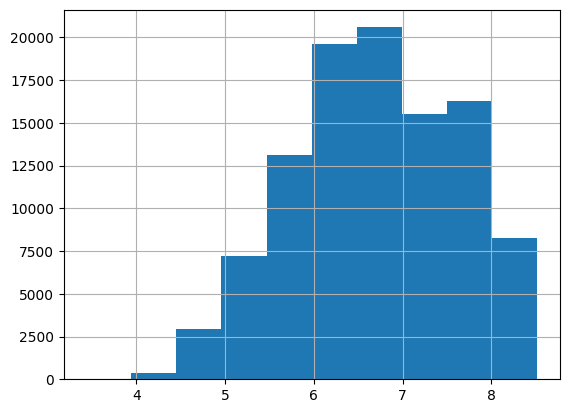

In [126]:
df['Flight Distance'] = np.log(df['Flight Distance'])
df['Flight Distance'].hist(bins=10)

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Do the same for test data

For Total Delay i will replace all the values greater than 500 minutes with the median value

In [127]:
df2['Flight Distance'] = np.log(df2['Flight Distance'])

In [128]:
data = df[df['Total Delay'] > 300]
len(data)

1643

In [129]:
df.loc[df['Total Delay'] > 300, 'Total Delay'] = 300

In [130]:
df2.loc[df2['Total Delay'] > 300, 'Total Delay'] = 300

<Axes: >

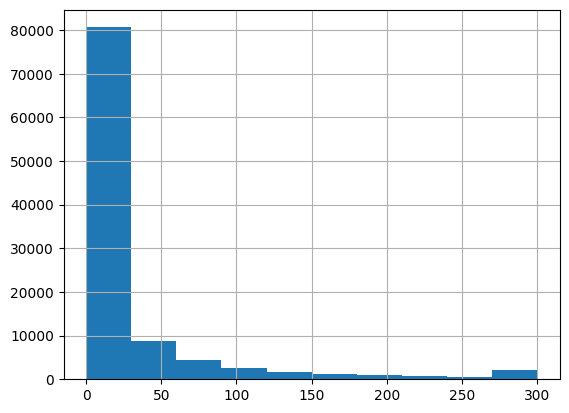

In [131]:
df['Total Delay'].hist(bins=10)

# Logistic Regression

Seperating target and independent variables

In [174]:
import time

In [132]:
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1"

In [133]:
X = pd.get_dummies(X)
df = pd.get_dummies(df)
df2 = pd.get_dummies(df2)

Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts: train and validation. We can train the model on this train part and using that make predictions for the validation part.

In [134]:
from sklearn.model_selection import train_test_split
X_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

The dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [136]:
pred_cv  = model.predict(x_cv)
accuracy_score(y_cv, pred_cv)

0.8686641858077762

Let's make prediction for out test dataset

In [137]:
pred_test = model.predict(df2)
accuracy_score(submissions,pred_test)

0.8669156144133046

Therefore, our accuracy score on test dataset is 86%

## Model Interpretation 
In model interpretation we look at the reason behind why the model predicted a certain class.

eli5 provides a way to compute feature importances for any black-box estimator.

After data processing , we can train our model using the GridSearch parameters.


In [138]:
from sklearn.model_selection import GridSearchCV

lr_model = LogisticRegression(class_weight="balanced", random_state=42,solver='liblinear', max_iter=1000)
gs = GridSearchCV(lr_model, {"C": [1., 1.3, 1.5]}, n_jobs= -1, cv = 5, scoring='balanced_accuracy')
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42,
                                          solver='liblinear'),
             n_jobs=-1, param_grid={'C': [1.0, 1.3, 1.5]},
             scoring='balanced_accuracy')

In [139]:
y_pred = gs.predict(x_cv)
acc = accuracy_score(y_cv, y_pred)
print(acc)

0.8699153086102913


In [140]:
print(gs.best_params_)
print(gs.best_score_)

{'C': 1.0}
0.8686397062996264


In [141]:
lr_model = gs.best_estimator_
lr_model.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Prediction on test dataset

In [142]:
y_pred = lr_model.predict(df2)
accuracy_score(submissions, y_pred)

0.8665691407453033

In [143]:
from sklearn.metrics import classification_report
print(classification_report(submissions, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     14573
           1       0.84      0.86      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.86      0.87      0.86     25976
weighted avg       0.87      0.87      0.87     25976



We got accuracy_score of 0.87. Not really impressive . Now we will use ELI5 to look inside the box and understand how it works. Import eli5 and use show_weights to visualise the weights of your model (Global Interpretation).

In [144]:
import eli5

eli5.show_weights(lr_model, feature_names=list(X_train.columns))

That's easier to read. This table gives us the weight associated to each feature. The amplitude tells us how much of an impact a feature has on the predictions on average, the sign tells us in which direction. 

**Here if the Online boarding, Inflight wifi service, Checkin service, On-board service, Leg room service, Cleanliness is taken care of the passenger is more like to give a satisfactory review.**

We can also use eli5 to explain a specific prediction, let's pick a row in the test data:

In [145]:
i = 56
df2.iloc[[i]]

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Age_40-49,Age_50-59,Age_60-69,Age_70-79,Age_80-89,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
56,6.338594,3,3,3,3,5,5,5,5,4,...,False,False,False,False,False,True,False,True,False,False


In [146]:
submissions.iloc[i]

1

So this passenger left a satisfied review! Let's see what our model predicted and how we could explain it to the domain expert

In [147]:
eli5.show_prediction(lr_model, df2.iloc[i], feature_names=list(X_train.columns), show_feature_values=True)

The contribution column is multiplication of Value of the feature & weight determined by eli5 for it .

Here eli5 does something really simple: knowing the weights associated to each feature and the actual value for all features for this specific observation, it can compute the contribution of each feature towards the prediction.

For this prediction, it looks like the most important factor was that the passenger rated (online boarding == 5), (inflight WI-FI service == 3).

## Decision Tree

In [148]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(class_weight="balanced")
gs = GridSearchCV(dt_model, {"max_depth": [17, 19, 21], 
                             "min_samples_split": [.005, .01, .05],  "criterion": ["gini", "entropy"]}, 
                  n_jobs=-1, cv=5, scoring="balanced_accuracy")

gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [17, 19, 21],
                         'min_samples_split': [0.005, 0.01, 0.05]},
             scoring='balanced_accuracy')

In [149]:
print(gs.best_params_)
print(gs.best_score_)

{'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 0.005}
0.9436553334394215


Store the best model best_estimator_ into a new variable dt_best_estimator that we can try to interpret later:

In [150]:
dt_model = gs.best_estimator_

Check accuracy and classification report

In [151]:
y_pred = dt_model.predict(df2)

print(accuracy_score(submissions, y_pred))
print(classification_report(submissions, y_pred))

0.9469895287958116
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     14573
           1       0.94      0.93      0.94     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



In [152]:
eli5.show_weights(lr_model, feature_names=list(X_train.columns))

**Here if the Online boarding, Inflight wifi service, Checkin service, On-board service, Leg room service, Cleanliness  and the Age is between 11-19 then are the features with more weightage**


## XG Boost Tree

In [153]:
from sklearn.xgboost import XGBClassifier

'''xgb_model = XGBClassifier()
estimator = XGBClassifier(objective= 'binary:logistic',
                         ntread = 4,
                         seed= 24)

parameters = {'max_depth': range(2, 5, 10),
             'n_estimators': range(180, 220, 40),
             'learning_rate': [0.1, 0.01, 0.05],
             "scoring": ['accuracy_score', "roc_auc"]}

gs = GridSearchCV(estimator = estimator,
                          param_grid = parameters,
                          n_jobs=10,
                          cv = 10,
                          verbose=True)'''     #{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 180, 'scoring': 'accuracy_score'}
xg_model = XGBClassifier(max_depth=2, n_estimators=180, scoring="accuracy_score", learning_rate=0.1)



xg_model.fit(X_train, y_train)
'''print(gs.best_params_)
print(gs.best_score_)
boost_model = gs.best_estimator_
y_pred = boost_model.predict(df2)
print(accuracy_score(submissions, y_pred))
print(classification_report(submissions, y_pred))'''

[08:05:31] WARNING: ../src/learner.cc:767: 
Parameters: { "scoring" } are not used.



'print(gs.best_params_)\nprint(gs.best_score_)\nboost_model = gs.best_estimator_\ny_pred = boost_model.predict(df2)\nprint(accuracy_score(submissions, y_pred))\nprint(classification_report(submissions, y_pred))'

In [154]:
# report on validation set
pred = xg_model.predict(x_cv)
print(accuracy_score(y_cv, pred))
print(classification_report(y_cv,pred))

0.9371872192993712
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     17812
           1       0.94      0.92      0.93     13360

    accuracy                           0.94     31172
   macro avg       0.94      0.93      0.94     31172
weighted avg       0.94      0.94      0.94     31172



In [155]:
# report on testing set 
y_pred = xg_model.predict(df2)
print(accuracy_score(submissions, y_pred))
print(classification_report(submissions, y_pred))

0.9367878041268863
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     14573
           1       0.94      0.92      0.93     11403

    accuracy                           0.94     25976
   macro avg       0.94      0.93      0.94     25976
weighted avg       0.94      0.94      0.94     25976



### Using Permutation Importance for global and model agnostic feature importance
eli5 implements another technique called **Permutation Importance** that is model agnostic and works for any black box model. By shuffling at random the values of a feature, we can observe how that affects the predictions and quantify how important that feature is. If we repeat on all features, we can get the overall importance of each feature and compare them. Let's try to do that on our models.


In [156]:
from eli5.sklearn import PermutationImportance

scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']

perm = PermutationImportance(xg_model, scoring='r2')

To ensure your interpretation corresponds to how your model works when it is used on new data, you need to train the permutation importance on unseen data, using the test set for instance.



In [157]:
perm.fit(df2, submissions)
eli5.show_weights(perm, feature_names= list(df2.columns))

Weight,Feature
0.5008 ± 0.0056,Inflight wifi service
0.3687 ± 0.0131,Type of Travel_Business travel
0.1422 ± 0.0041,Customer Type_Loyal Customer
0.1398 ± 0.0073,Online boarding
0.0294 ± 0.0061,Checkin service
0.0218 ± 0.0044,Class_Business
0.0183 ± 0.0018,Departure/Arrival time convenient
0.0141 ± 0.0014,Leg room service
0.0126 ± 0.0031,Baggage handling
0.0107 ± 0.0032,On-board service


## Random Forest

In [158]:
from sklearn.ensemble import RandomForestClassifier

paramgrid = {'max_depth': [10,15,20,None], 'n_estimators': [90,80,70]}   # max_depth = None works
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid, scoring = "neg_mean_absolute_percentage_error")
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10, 15, 20, None],
                         'n_estimators': [30, 50, 70]},
             scoring='neg_mean_absolute_percentage_error')

In [159]:
grid_search.best_estimator_

RandomForestClassifier(n_estimators=70, random_state=1)

In [160]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': None, 'n_estimators': 70}
-56099819926881.89


In [161]:
rf_model = grid_search.best_estimator_

In [162]:
y_pred = rf_model.predict(df2)
print(accuracy_score(submissions, y_pred))
print(classification_report(submissions, y_pred))

0.9612719433323067
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



## Feature Selection on Random Forest

In [163]:
rf_model.feature_importances_

array([3.29749404e-02, 1.39564590e-01, 1.72669773e-02, 3.87144369e-02,
       1.73481317e-02, 1.33494696e-02, 1.35612502e-01, 5.09966773e-02,
       6.28227321e-02, 2.94723113e-02, 3.18333490e-02, 2.55523131e-02,
       2.68213187e-02, 2.59910646e-02, 2.49351935e-02, 1.67298725e-02,
       3.60143690e-03, 3.53874027e-03, 2.59195665e-02, 2.41990522e-02,
       8.44905602e-04, 2.77851576e-03, 5.39144998e-03, 4.37036342e-03,
       3.46971810e-03, 2.80972805e-03, 2.26832567e-03, 6.17740719e-04,
       3.17453163e-05, 5.80468939e-02, 6.80372720e-02, 6.61584368e-02,
       3.58852334e-02, 2.04499543e-03])

In [164]:
feature_importance = pd.DataFrame({'importance': rf_model.feature_importances_}, index = list(X.columns)).sort_values('importance')

In [165]:
feature_importance.head(5)

,importance
Age_80-89,0.000032
Age_70-79,0.000618
Age_0-9,0.000845
Class_Eco Plus,0.002045
Age_60-69,0.002268


<Axes: >

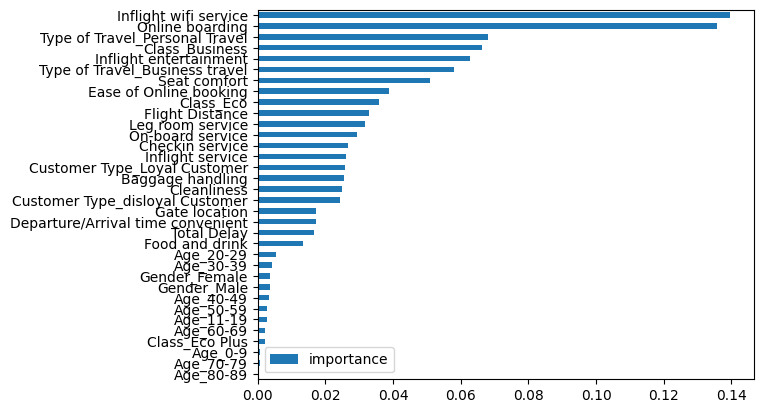

In [166]:
feature_importance.plot.barh()

In the above plot we can clear see the importance level of each feature in our dataset. Now, i will keep all the features who's importance are greater than 0.04 and train the model on those features

In [167]:
imp_features = feature_importance[feature_importance.importance > 0.02]
imp_features.index

Index(['Customer Type_disloyal Customer', 'Cleanliness', 'Baggage handling',
       'Customer Type_Loyal Customer', 'Inflight service', 'Checkin service',
       'On-board service', 'Leg room service', 'Flight Distance', 'Class_Eco',
       'Ease of Online booking', 'Seat comfort',
       'Type of Travel_Business travel', 'Inflight entertainment',
       'Class_Business', 'Type of Travel_Personal Travel', 'Online boarding',
       'Inflight wifi service'],
      dtype='object')

Now that I have the list of important features I will re-train the model on these features

In [168]:
X_new = X[list(imp_features.index)]
X_new.head(5)

,Customer Type_disloyal Customer,Cleanliness,Baggage handling,Customer Type_Loyal Customer,Inflight service,Checkin service,On-board service,Leg room service,Flight Distance,Class_Eco,Ease of Online booking,Seat comfort,Type of Travel_Business travel,Inflight entertainment,Class_Business,Type of Travel_Personal Travel,Online boarding,Inflight wifi service
0,False,5,4,True,5,4,4,3,6.131226,False,3,5,False,5,False,True,3,3
1,True,1,3,False,4,1,1,5,5.459586,False,3,1,True,1,True,False,3,3
2,False,5,4,True,4,4,4,3,7.040536,False,2,5,True,5,True,False,5,2
3,False,2,3,True,4,1,2,5,6.331502,False,5,2,True,2,True,False,2,2
4,False,3,4,True,3,3,3,4,5.365976,False,3,5,True,3,True,False,5,3


In [169]:
test_new = df2[list(X_new.columns)]

In [170]:
X_new.replace({True:1, False:0})

,Customer Type_disloyal Customer,Cleanliness,Baggage handling,Customer Type_Loyal Customer,Inflight service,Checkin service,On-board service,Leg room service,Flight Distance,Class_Eco,Ease of Online booking,Seat comfort,Type of Travel_Business travel,Inflight entertainment,Class_Business,Type of Travel_Personal Travel,Online boarding,Inflight wifi service
0,0,5,4,1,5,4,4,3,6.131226,0,3,5,0,5,0,1,3,3
1,1,1,3,0,4,1,1,5,5.459586,0,3,1,1,1,1,0,3,3
2,0,5,4,1,4,4,4,3,7.040536,0,2,5,1,5,1,0,5,2
3,0,2,3,1,4,1,2,5,6.331502,0,5,2,1,2,1,0,2,2
4,0,3,4,1,3,3,3,4,5.365976,0,3,5,1,3,1,0,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1,2,4,0,3,2,3,1,5.257495,1,2,2,1,2,0,0,2,2
103900,0,4,5,1,5,5,5,5,7.760893,0,4,5,1,5,1,0,4,4
103901,1,4,4,0,5,5,3,2,7.598399,0,1,5,1,4,1,0,1,1
103902,1,1,1,0,4,5,4,5,6.907755,1,1,1,1,1,0,0,1,1


In [171]:
X_new_train, X_new_cv, y_new_train, y_new_cv = train_test_split(X_new, y, test_size = 0.3)

In [175]:
paramgrid = {'max_depth': [20,25,30,None], 'n_estimators': [100,150]}  
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid, scoring = "r2")
grid_search.fit(X_new_train, y_new_train)

KeyboardInterrupt: 

In [ ]:
grid_search.best_estimator_

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

In [ ]:
rf_model = grid_search.best_estimator_

Classification Report on Validation DataSet

In [ ]:
y_pred = rf_model.predict(X_new_cv)
print(accuracy_score(y_new_cv, y_pred))
print(classification_report(y_new_cv, y_pred))

Classification Report on Test Dataset

In [ ]:
y_pred = rf_model.predict(test_new)
print(accuracy_score(submissions, y_pred))
print(classification_report(submissions, y_pred))

Here, we can note that the accuracy of the model before and after performing feature selection is the same 96%, that means other features don't add any value to the outcome and removing them would make the computation less complex and faster